!["./Screenshot 2025-11-03 145507.jpg"](Screenshot%202025-11-03%20145507.jpg)

!["./q1.jpg"](q1.jpg)

$e_s = <S_x,S_y>$

$e_t = <T_x,T_y>$

$e_s•q = \frac{<S_x,S_y>•<q_x,q_y>}{||<S_x,S_y>||^2} *e_s = \frac{(S_x*q_x+S_y*q_y)<S_x,S_y>}{1} $

$e_t•q = \frac{<T_x,T_y>•<q_x,q_y>}{||<q_x,q_y>||^2} *e_t = \frac{(T_x*q_x+T_y*q_y)<T_x,T_y>}{1}$

q in the space [S,T] is $[(S_x*q_x+S_y*q_y)<S_x,S_y>, (T_x*q_x+T_y*q_y)<T_x,T_y>]$



In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Write your own class in Python to perform PCA analysis. Require that your input data
follow the format where rows are samples and columns are variables. Your function
should do the following:
1. Do mean-centering.
2. Compute the covariance matrix using numpy.cov().
3. Perform eigen-decomposition using numpy.linalg.eig().
4. Project the data onto the principal component axes.
5. Return the variance and percent variance that each PC explains, all of the scores,
and loadings.

In [5]:
def mean_centering(df):
    for variable in df.columns:
        df[variable] = df[variable] - np.mean(df[variable])



Covariance matrix

$cov(x,y) = \frac{ \sum (x_i-x̄)(y_i-ȳ) }{n-1}$

$var(x) = \frac{ \sum (x_i-x̄)^2 }{n-1}$

In [ ]:
class MyPCA:

    """Calculate the PCA for mean centered data"""
    def __init__(self, x):
        self.x = x
        self.covariance_matrix: np.array = None
        self.variance: np.array = None
        self.principal_components: np.array = None
        self.projections: np.array = None

    def covariance(self):
        self.covariance_matrix = np.cov(self.x)
        # matrix_copy = self.x.copy()
        # variable_means = [np.mean(column) for column in matrix_copy] ## should be near 0 since we mean centered
        
        # for index, mean in enumerate(variable_means):
        #     matrix_copy[index] = matrix_copy[index] - mean
        # cov = []

        # for column in matrix_copy:
        #     column_list = []
        #     for column2 in matrix_copy:
        #         # column_list.append( round( sum(column * column2)/ (len(column) - 1), 8 )  )
        #         column_list.append( sum(column * column2)/ (len(column) - 1)  )

        #     cov.append(column_list)

        # self.covariance_matrix = cov

    def compute_eigens(self):
        """1. Eigenvalue decomposition
           2. Ensures the eigenvalues and eigenvectors are ordered."""
        if not self.covariance_matrix:
            self.covariance()
        vals, vec = np.linalg.eig(self.covariance_matrix)
        # sorted_vals = []
        # max = vals[0]
        # vals = [6,17,18,18,100,4,3,0]
        index = vals.argsort()[::-1]
        self.variance = vals[index]
        self.principal_components = (vec[:, index]).T * -1
    
    def percent_variance_explained(self):
        if self.variance is None:
            self.compute_eigens()

        return self.variance/sum(self.variance) * 100
    
    def projection(self):
        """Compute Y = X*P aka project the principal components onto X"""
        if self.variance is None:
            self.compute_eigens()

        self.projections = np.matmul(self.x.T, self.principal_components)
    
    def scree_plot(self):
        if self.variance is None:
            raise Exception("Do eigendecomposition first.")
        variance = self.percent_variance_explained()
        x_axis = np.array(["PC "+str(i+1) for i in range(len(variance))])   
        
        plt.plot(x_axis, variance, linestyle = "-", marker = "o", label = "PC")
        plt.title("scree plot")
        plt.legend()
        plt.show()

    def loading_plot(self):
        if self.principal_components is None or self.projections is None:
            raise Exception("Do eigendecomposition first and compute the projections.")
        # Set figsize and other layout parameters
        plt.title("loadings plot")
        plt.figure(figsize=(8, 8))
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')

        # Add variable labels to the plot
        for i, feature in enumerate(df.columns):

            # Add the name of the variable near the arrow
            plt.annotate(feature, # variable name
                        (self.principal_components.T[i, 0],
                        self.principal_components.T[i, 1]),
                        color='red')
            
            # Add an arrow representing the variable on the new axis
            plt.arrow(0,0,
                    self.principal_components.T[i, 0],
                    self.principal_components.T[i, 1],
                    color='black',
                    alpha=0.7, 
                    width=0.01,
                    )

        # Fix x-axis between -1 and 1 is important for better visualization
        plt.xlim(-1,1)
        plt.ylim(-1,1)

        # Add grid in the background
        plt.grid(True)

        # Display the chart
        plt.show()
        

    def scores_plot(self):
        if self.projections is None:
            raise("Compute projections first.")
        
        projections = self.projections.T
        plt.scatter(projections[0], projections[1])
        plt.title("scores plot")
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.show()

# 3. (20 points)
Apply your own PCA function to the dataset “Homework 2 dataset prob3.csv”. In this
dataset, columns correspond to variables.
- Plot the scores plot.
- Do you see a clear separation of the raw data?
- Can you still separate them after you project your raw data onto your first principal component?
- What message can you get from this observation?
- What is the variance of the projections on PC1 and PC2. What is the relationship
between these variances and the eigenvalues of your covariance matrix?

In [6]:
df = pd.read_csv("data/Homework_2_dataset_prob3.csv")
mean_centering(df)

matrix = df.to_numpy()



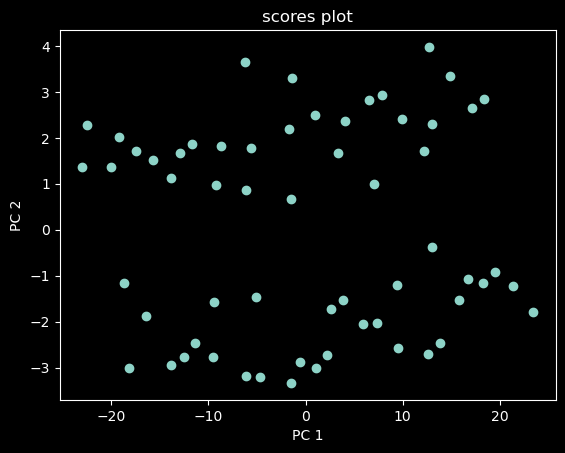

In [78]:
pca_matrix = MyPCA(x = matrix.T)

pca_matrix.compute_eigens()
pca_matrix.projection()

pca_matrix.scores_plot()



### Do you see a clear separation of the raw data?

The plot of the raw data

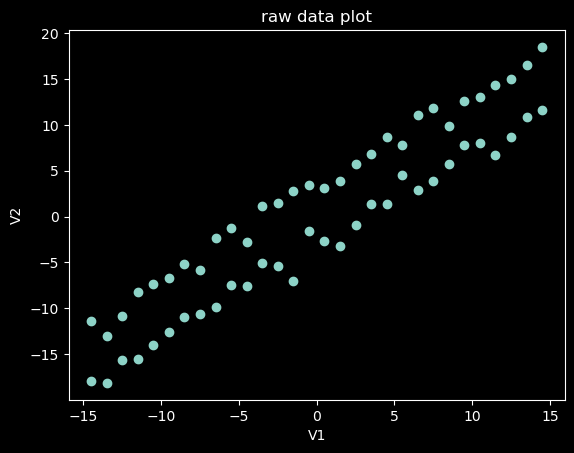

In [74]:
plt.scatter(df.V1, df.V2)
plt.title("raw data plot")
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

The plot of the raw data has some separation. We can draw a line which separates the data into two groups.

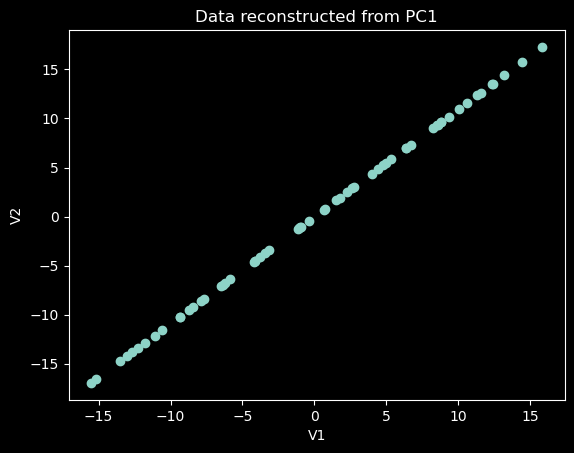

In [75]:
matrix1 = np.atleast_2d(pca_matrix.principal_components[0]).T
matrix2 = np.atleast_2d(np.matmul( matrix, pca_matrix.principal_components[0] )) ## np.atleast_2d(pca_matrix.projections.T[0]) 

pc1_projected = np.matmul(matrix1 , matrix2 )
pc1_projected.shape

plt.scatter(pc1_projected[0], pc1_projected[1])
plt.title("Data reconstructed from PC1")
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

### - Can you still separate them after you project your raw data onto your first principal component?
### - What message can you get from this observation?

After reconstructing the data, the data is not separatable since we removed all the noise. This tells me the second group most likely fell along PC2.

### - What is the variance of the projections on PC1 and PC2. What is the relationship between these variances and the eigenvalues of your covariance matrix?

The variances explained by PC1 and PC2 respectively are 161.041 and 5.125. The variances are the eigenvalues of my covariance matrix. 

In [76]:

print(f"covariance matrix: { np.cov( pca_matrix.projections.T) }\neigenvalues: {pca_matrix.variance}")

covariance matrix: [[1.61040724e+02 1.37923788e-14]
 [1.37923788e-14 5.12528389e+00]]
eigenvalues: [161.04072383   5.12528389]


# 4. (20 points)
Apply your own PCA function to the dataset “Homework 2 dataset prob4.csv”. In
this dataset, rows correspond to different variables and columns correspond to different
samples. You will need to transpose it before PCA analysis because your own PCA
function requires columns to be variables. Plot the scree plot for PC1 and PC2 and
indicate the percentage of variance that PC1 and PC2 explains respectively. Also plot
the scores plot and loadings plot.
2

In [117]:
df2 = pd.read_csv("data/Homework_2_dataset_prob4.csv", sep = ",").transpose()
# Set the first row (original column names) as new column headers
new_columns = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_columns

# mean_centering(df2.drop("ComponentID"))

matrix2 = df2.to_numpy().astype(float)

df2

ComponetID,v1,v5,v17,v51,v68,v79,v117,v118,v132,v138,...,v4681,v4686,v4690,v4700,v4711,v4762,v4779,v4816,v4821,v4888
s 1,13149,162952,0,36557,0,173049,876770,155480,6458,11102,...,6290,10069,5827,0,168228,10179,189013,0,0,48345
s 3,15519,180989,31487,38760,0,117192,553371,26951,6316,2424,...,6809,0,5810,0,143683,7378,115520,0,0,125184
s 5,19836,158248,85956,35297,4938,152004,1525264,118552,5565,9918,...,14066,0,11784,2572,162778,6003,147683,2256,9181,139848
s 7,15295,229520,0,37840,4550,99548,916726,70027,4690,0,...,15710,18619,0,1450,160915,8358,161317,0,3429,203533
s 9,13914,263812,0,24565,6474,141102,1330384,212695,6138,11507,...,18872,31384,0,0,128767,7390,172217,1613,10970,853223
s11,20420,0,71313,19599,5683,117173,621676,0,6676,11898,...,17330,19340,0,4103,324707,21486,354677,0,1696,247335
s13,0,52334,154987,34990,5026,99758,1079832,0,0,7431,...,12977,4530,5364,0,319847,24798,426314,1197,8133,69474
s15,9446,255144,0,18844,6963,129630,2014771,153927,0,8669,...,14672,18686,0,0,361370,22935,411819,1513,0,75206
s17,0,0,113738,29631,8716,76964,1196309,200490,0,6587,...,10424,6117,9251,0,180628,13730,195176,0,0,168838
s19,0,248804,0,38666,5780,101756,925441,126646,6802,11049,...,15216,0,10270,2769,136620,6075,126239,1572,4630,242081


c:\Users\brean\miniconda3\envs\machinelearning\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\brean\miniconda3\envs\machinelearning\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


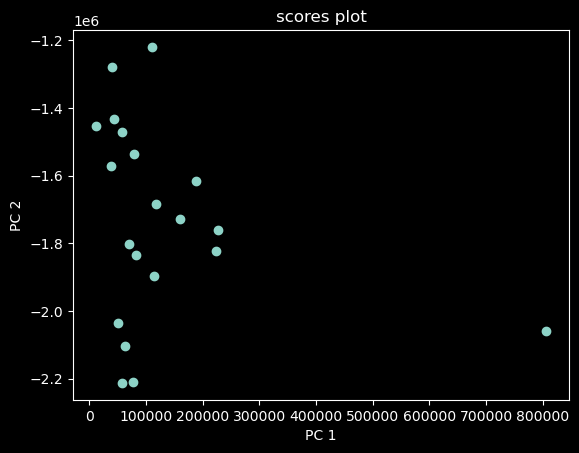

(277,)

In [133]:
pca_matrix2 = MyPCA(x = matrix2.T)


pca_matrix2.compute_eigens()
pca_matrix2.projection()

pca_matrix2.scores_plot()

pca_matrix2.variance.shape

In [120]:
np.cov(matrix2.T)

array([[ 6.37708287e+07,  1.49877414e+08, -1.47579764e+08, ...,
        -8.12283211e+05,  8.39194371e+06,  3.43394656e+08],
       [ 1.49877414e+08,  1.07538644e+10, -6.51372592e+09, ...,
         1.36315225e+07, -4.44802918e+07,  5.01588364e+09],
       [-1.47579764e+08, -6.51372592e+09,  4.89190098e+09, ...,
         1.23453571e+07,  1.03388327e+08, -3.37260194e+09],
       ...,
       [-8.12283211e+05,  1.36315225e+07,  1.23453571e+07, ...,
         1.01592880e+06,  1.60645982e+06,  2.70235074e+07],
       [ 8.39194371e+06, -4.44802918e+07,  1.03388327e+08, ...,
         1.60645982e+06,  1.96238851e+07,  2.13422839e+08],
       [ 3.43394656e+08,  5.01588364e+09, -3.37260194e+09, ...,
         2.70235074e+07,  2.13422839e+08,  3.19437545e+10]])

In [64]:
np_cov = np.cov(matrix.T)

vals, vec = np.linalg.eig(np_cov)

# np_cov

vec


array([[-0.7377213 , -0.67510539],
       [ 0.67510539, -0.7377213 ]])

In [130]:
from sklearn.decomposition import PCA

# pca = PCA().fit(matrix)
# pca.explained_variance_
# pca.components_ #* np.sqrt(pca.explained_variance_ratio_)
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# pca = PCA(n_components=2)

# pca.fit(X)

pca = PCA()  # Reduce to 2 principal components for 2D plotting
principal_components = pca.fit_transform(matrix2)

pca.components_

# plt.figure(figsize=(8, 6))
# plt.scatter(principal_components [:, 0], principal_components[:, 1])
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Scores Plot (PCA)')
# plt.grid(True)
# plt.show()

pca.components_.shape

(20, 277)